In [1]:
# Импорт библиотеки
import sys
import os

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Добавим текущую директорию в системный путь
sys.path.append(os.getcwd())
sys.path.append(os.getcwd() + '/research')

In [3]:
sys.path

['/home/redalexdad/Документы/GitHub/SpeechTraining',
 '/home/redalexdad/anaconda3/lib/python311.zip',
 '/home/redalexdad/anaconda3/lib/python3.11',
 '/home/redalexdad/anaconda3/lib/python3.11/lib-dynload',
 '',
 '/home/redalexdad/anaconda3/lib/python3.11/site-packages',
 '/home/redalexdad/Документы/GitHub/SpeechTraining',
 '/home/redalexdad/Документы/GitHub/SpeechTraining/research']

In [4]:
# Сбор список слов
from collection import collection

In [24]:
for theme, words in collection.items():
    print(f"Тема: {theme}")
    print("Слова:", ', '.join(words))
    print("\n")

Тема: Повседневные разговоры
Слова: привет, здравствуй, дела, новости, планы, увлечения, погода, спорт, еда, фильмы, книги, отпуск, друзья, музыка, работа, хобби, здоровье, компьютер, животные, путешествия, учеба, семья, техника, встреча, отдых, финансы, покупки, событие, время, праздник, до свидания


Тема: Технические
Слова: робот, инженер, автоматизация, электроника, кластеризация, механизм, технология, схема, компонент, программное обеспечение, микроконтроллер, конструкция, инновация, кодирование, энергия, проектирование, технический рисунок, сенсор, трансформатор, оптика, датчик, реактор, прототип, печатная плата, алгоритм, двигатель, вычислитель, автоматика, цифровой


Тема: Бытовые
Слова: пылесос, стиральная машина, микроволновка, кофеварка, утюг, тостер, холодильник, телевизор, пылесборник, посудомоечная машина, блендер, электрочайник, вентилятор, увлажнитель, кондиционер, лампочка, весы, фен, мультиварка, электронагреватель, фильтр, чайник, усилитель сигнала, ручной миксер, ви

In [5]:
# Соединение с БД
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="dataset_speech_recognition",
    user="postgres",
    password="postgres"
)
cur = conn.cursor()

In [6]:
# Получение данных из таблицы
cur.execute("SELECT * FROM recognition_data")
data = cur.fetchall()

In [7]:
# Закрытие соединения
cur.close()
conn.close()

In [8]:
# Создание DataFrame из полученных данных
df = pd.DataFrame(data, columns=['id', 'data_recognition', 'transcription_word', 'word_for_check', 'date_recoding', 'wer', 'cer', 'mer', 'wil', 'iwer'])

In [9]:
# Преобразование столбца date_recoding в формат datetime
df['date_recoding'] = pd.to_datetime(df['date_recoding'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2662 non-null   int64         
 1   data_recognition    2662 non-null   object        
 2   transcription_word  2662 non-null   object        
 3   word_for_check      2662 non-null   object        
 4   date_recoding       2662 non-null   datetime64[ns]
 5   wer                 2662 non-null   float64       
 6   cer                 2662 non-null   float64       
 7   mer                 2662 non-null   float64       
 8   wil                 2662 non-null   float64       
 9   iwer                2662 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 208.1+ KB


In [11]:
df.head()

,id,data_recognition,transcription_word,word_for_check,date_recoding,wer,cer,mer,wil,iwer
0,1,"[b'A', b'A', b'A', b'A', b'A', b'A', b'A', b'A...",рапуд!,робот,2024-04-21,1.0,1.000000,1.0,1.0,0.0
1,2,"[b'A', b'A', b'A', b'A', b'A', b'A', b'A', b'A...",крыс!,инженер,2024-04-21,1.0,1.000000,1.0,1.0,0.0
2,3,"[b'A', b'A', b'A', b'A', b'A', b'A', b'A', b'A...",а в этом суть?,автоматизация,2024-04-21,4.0,0.846154,1.0,1.0,0.0
3,4,"[b'A', b'A', b'A', b'A', b'A', b'A', b'A', b'A...",актеристика.,электроника,2024-04-21,1.0,0.727273,1.0,1.0,0.0
4,5,"[b'A', b'A', b'A', b'A', b'A', b'A', b'A', b'A...",руповерт!,робот,2024-04-22,1.0,1.200000,1.0,1.0,0.0


In [12]:
research_df = df.drop(['id', 'data_recognition'], axis=1)
research_df = research_df.set_index('date_recoding')

In [13]:
research_df.head()

,transcription_word,word_for_check,wer,cer,mer,wil,iwer
date_recoding,,,,,,,
2024-04-21,рапуд!,робот,1.0,1.000000,1.0,1.0,0.0
2024-04-21,крыс!,инженер,1.0,1.000000,1.0,1.0,0.0
2024-04-21,а в этом суть?,автоматизация,4.0,0.846154,1.0,1.0,0.0
2024-04-21,актеристика.,электроника,1.0,0.727273,1.0,1.0,0.0
2024-04-22,руповерт!,робот,1.0,1.200000,1.0,1.0,0.0


In [14]:
research_df[research_df['word_for_check'] == 'робот'].head

<bound method NDFrame.head of               transcription_word word_for_check  wer  cer  mer  wil  iwer
date_recoding                                                            
2024-04-21                рапуд!          робот  1.0  1.0  1.0  1.0   0.0
2024-04-22             руповерт!          робот  1.0  1.2  1.0  1.0   0.0
2024-04-23                  ром!          робот  1.0  0.6  1.0  1.0   0.0
2024-04-24               рупоть!          робот  1.0  0.8  1.0  1.0   0.0
2024-04-25                салют.          робот  1.0  1.0  1.0  1.0   0.0
2024-04-29      ангина джангира.          робот  2.0  3.2  1.0  1.0   0.0
2024-04-30              пробуть!          робот  1.0  0.8  1.0  1.0   0.0
2024-05-03                робот!          робот  1.0  0.2  1.0  1.0   0.0
2024-05-02             хорошего!          робот  1.0  1.2  1.0  1.0   0.0
2024-05-05                робот!          робот  1.0  0.2  1.0  1.0   0.0
2024-05-06                     а          робот  1.0  1.0  1.0  1.0   0.0
2024-05-

In [15]:
# Сохраняем метрики
metrics = ['wer', 'cer', 'mer', 'wil', 'iwer']

# Словарь цветов для метрик
colors = {
    'wer': 'b',    # синий
    'cer': 'g',    # зеленый
    'mer': 'r',    # красный
    'wil': 'c',    # голубой
    'iwer': 'm'    # фиолетовый
}

In [32]:
def draw_plot(word):
    # Фильтрация данных по слову
    filtered_df = research_df[research_df['word_for_check'] == word].sort_index()

    for metric in metrics:
        # Построение графика
        plt.figure(figsize=(10, 5))
        plt.plot(filtered_df.index, filtered_df[metric], marker='o', linestyle='-', color='b')
        plt.title(f'Изменение {metric} с течением времени для слова "{word}"')
        plt.xlabel('Дата')
        plt.ylabel(metric.upper())
        plt.grid(True)
        plt.xticks(rotation=45)
        
        # Добавление надписей
        for idx, row in filtered_df.iterrows():
            plt.annotate(row['transcription_word'], (idx, row['wer']), textcoords="offset points", xytext=(0,10), ha='center', rotation=45)
        
        plt.tight_layout()
        
        # Показ графика
        plt.show()

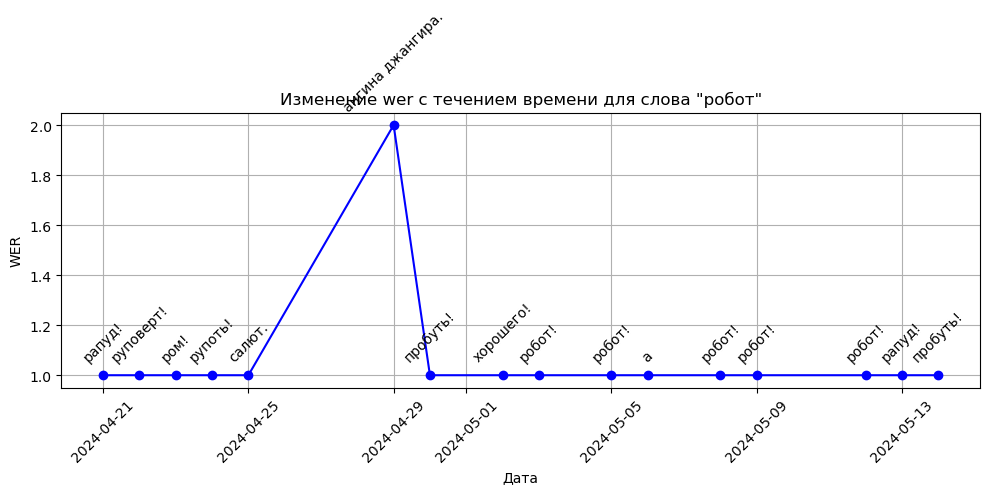

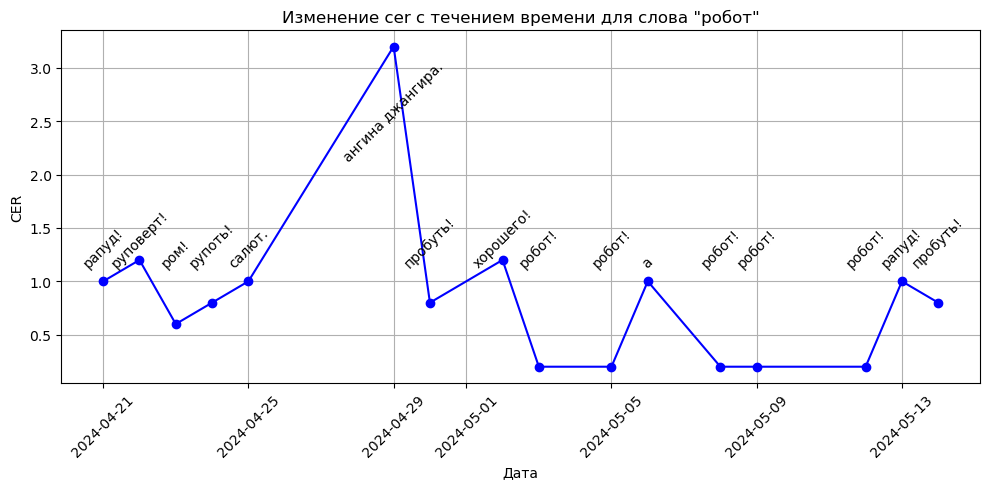

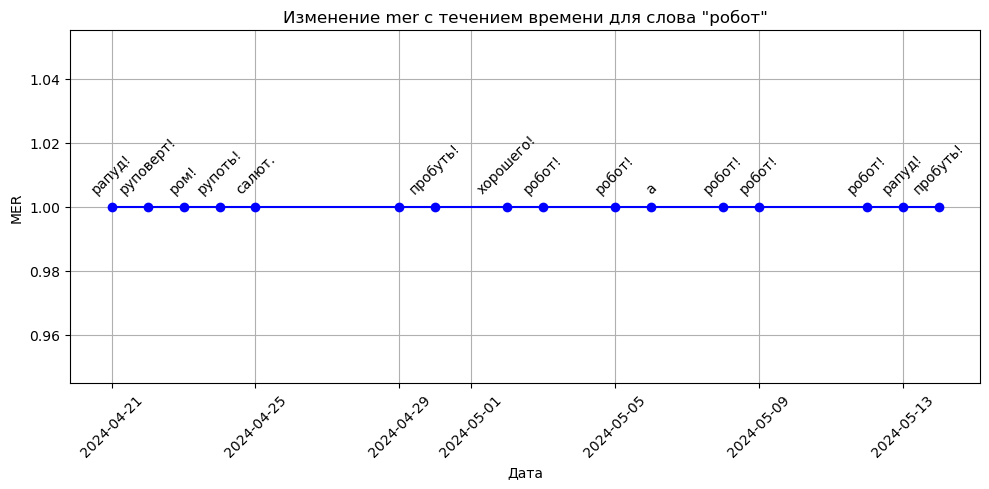

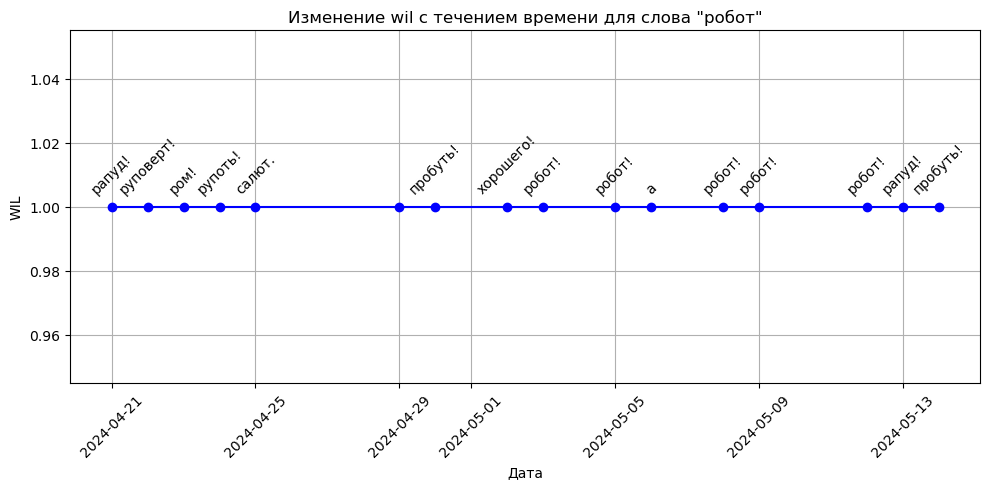

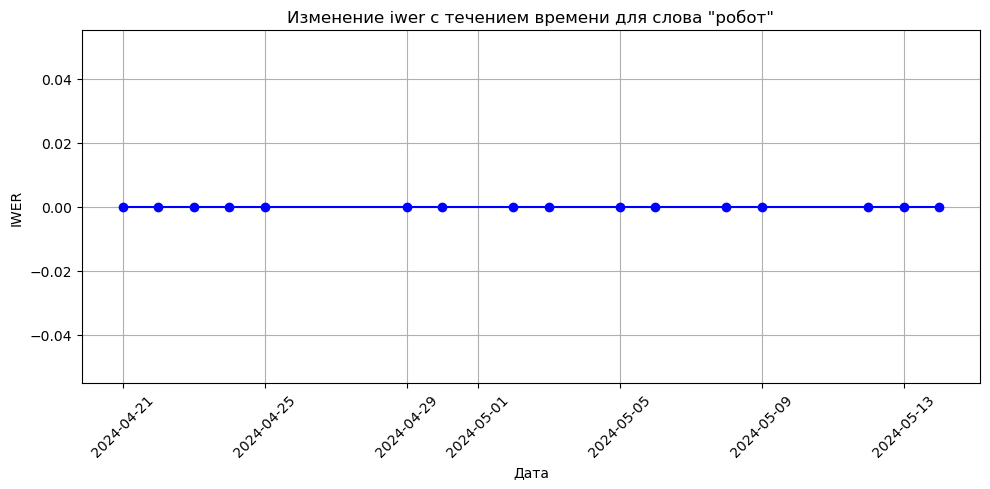

In [33]:
draw_plot('робот')

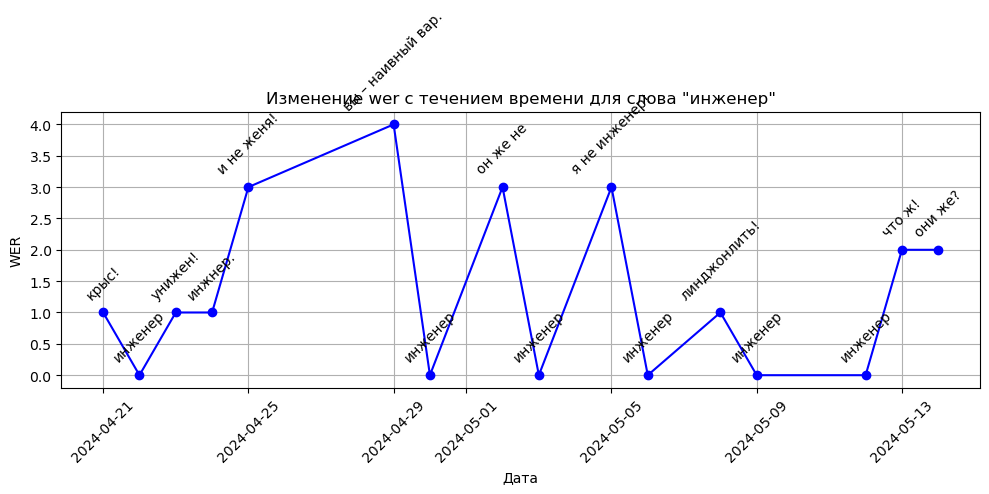

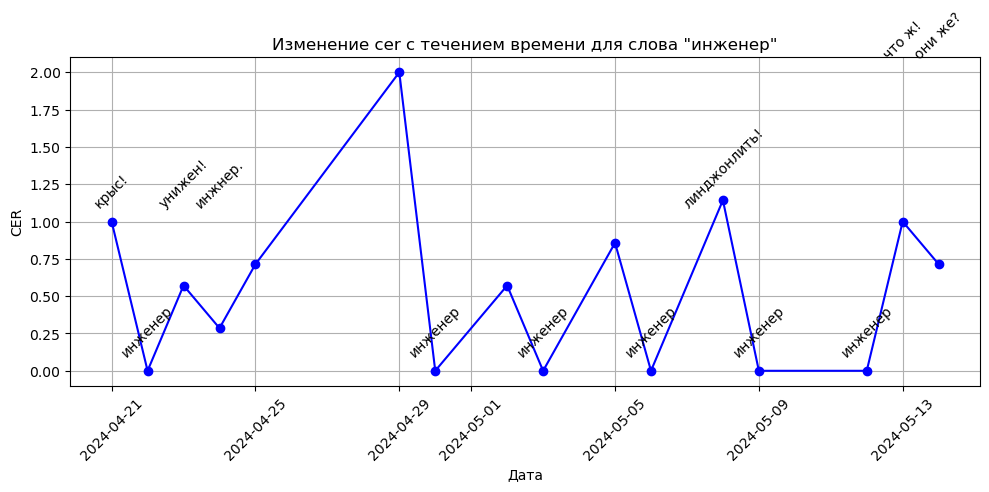

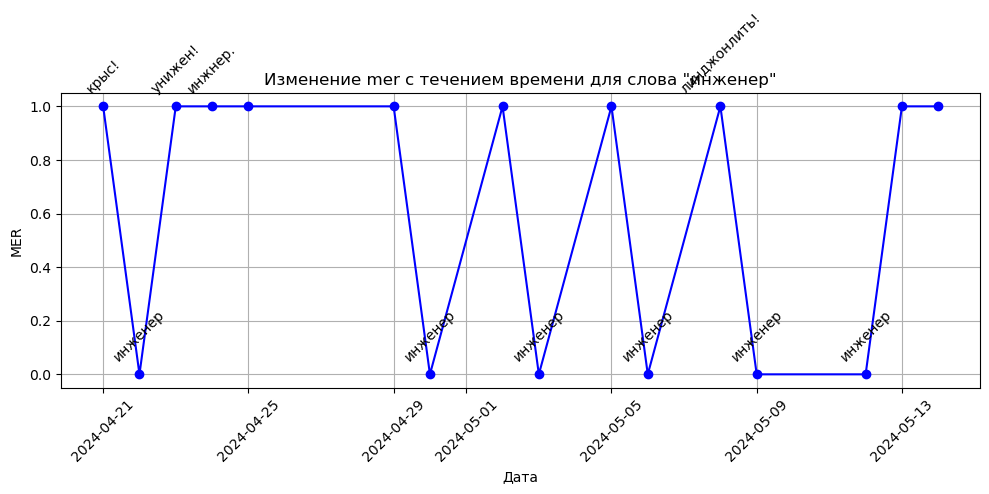

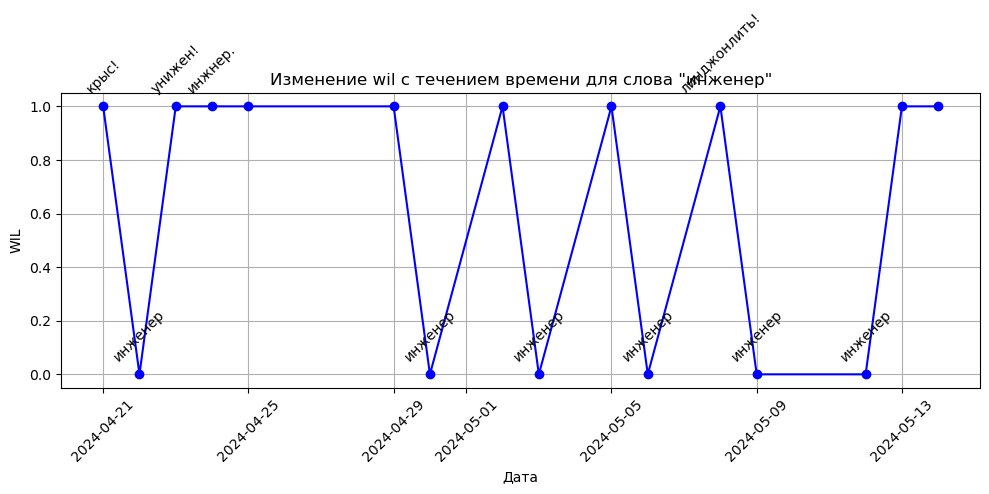

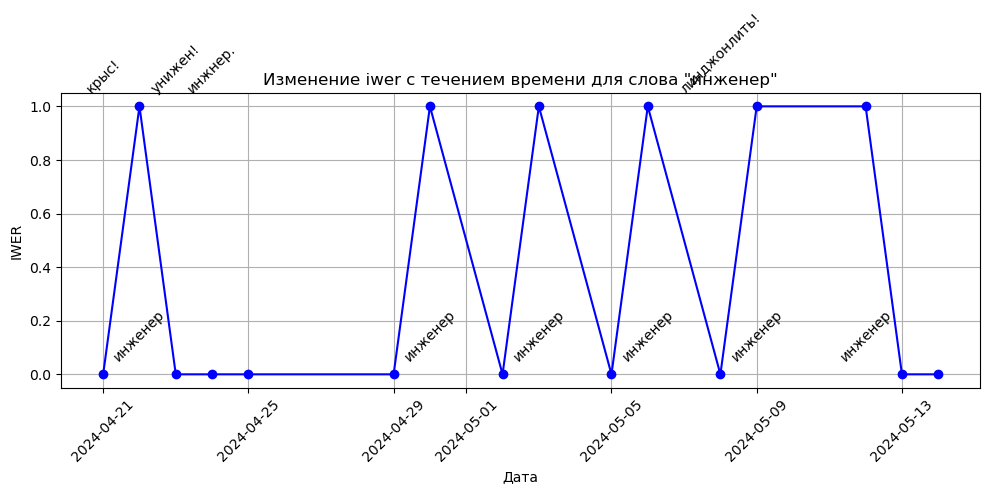

In [34]:
draw_plot('инженер')

In [17]:
# # Построение графика
# plt.figure(figsize=(12, 6))

# for metric in metrics:
#     plt.plot(filtered_df.index, filtered_df[metric], marker='o', linestyle='-', color=colors[metric], label=metric.upper())

# # Добавление надписей
# for idx, row in filtered_df.iterrows():
#     plt.annotate(row['transcription_word'], (idx, row[metric]), textcoords="offset points", xytext=(0,10), ha='center', rotation=45)

# plt.title('Изменение метрик с течением времени для слова "робот"')
# plt.xlabel('Дата')
# plt.ylabel('Значение метрики')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.legend()  # добавление легенды
# plt.tight_layout()

# # Показ графика
# plt.show()

In [18]:
# # Построение графика
# plt.figure(figsize=(12, 6))

# for metric in metrics:
#     plt.plot(filtered_df.index, filtered_df[metric], marker='o', linestyle='-', color=colors[metric], label=metric.upper())

# plt.title('Изменение метрик с течением времени для слова "робот"')
# plt.xlabel('Дата')
# plt.ylabel('Значение метрики')
# plt.grid(True)

# # Создание меток для оси x, которые включают слова и даты
# x_labels = [f'{word}\n{date.strftime("%Y-%m-%d")}' for word, date in zip(filtered_df['transcription_word'], filtered_df.index)]

# # Установка меток для оси x
# plt.xticks(ticks=filtered_df.index, labels=x_labels, rotation=45)

# plt.legend()  # добавление легенды
# plt.tight_layout()

# # Показ графика
# plt.show()

In [19]:
# # Построение графика
# plt.figure(figsize=(12, 6))

# # Добавление надписей для слов в самом верху
# for idx, row in filtered_df.iterrows():
#     plt.annotate(row['transcription_word'], (idx, max(filtered_df[metric])), textcoords="offset points", xytext=(0,10), ha='center', rotation=45)


# for metric in metrics:
#     plt.plot(filtered_df.index, filtered_df[metric], marker='o', linestyle='-', color=colors[metric], label=metric.upper())


# plt.title('Изменение метрик с течением времени для слова "робот"')
# plt.xlabel('Дата')
# plt.ylabel('Значение метрики')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.legend()  # добавление легенды
# plt.tight_layout()

# # Показ графика
# plt.show()

In [25]:
# Фильтрация данных по слову 'инженер'
filtered_df = research_df[research_df['word_for_check'] == 'инженер'].sort_index()
filtered_df.head

<bound method NDFrame.head of               transcription_word word_for_check  wer       cer  mer  wil  iwer
date_recoding                                                                 
2024-04-21                 крыс!        инженер  1.0  1.000000  1.0  1.0   0.0
2024-04-22               инженер        инженер  0.0  0.000000  0.0  0.0   1.0
2024-04-23               унижен!        инженер  1.0  0.571429  1.0  1.0   0.0
2024-04-24               инжнер.        инженер  1.0  0.285714  1.0  1.0   0.0
2024-04-25            и не женя!        инженер  3.0  0.714286  1.0  1.0   0.0
2024-04-29     вы – наивный вар.        инженер  4.0  2.000000  1.0  1.0   0.0
2024-04-30               инженер        инженер  0.0  0.000000  0.0  0.0   1.0
2024-05-02              он же не        инженер  3.0  0.571429  1.0  1.0   0.0
2024-05-03               инженер        инженер  0.0  0.000000  0.0  0.0   1.0
2024-05-05         я не инженер!        инженер  3.0  0.857143  1.0  1.0   0.0
2024-05-06            

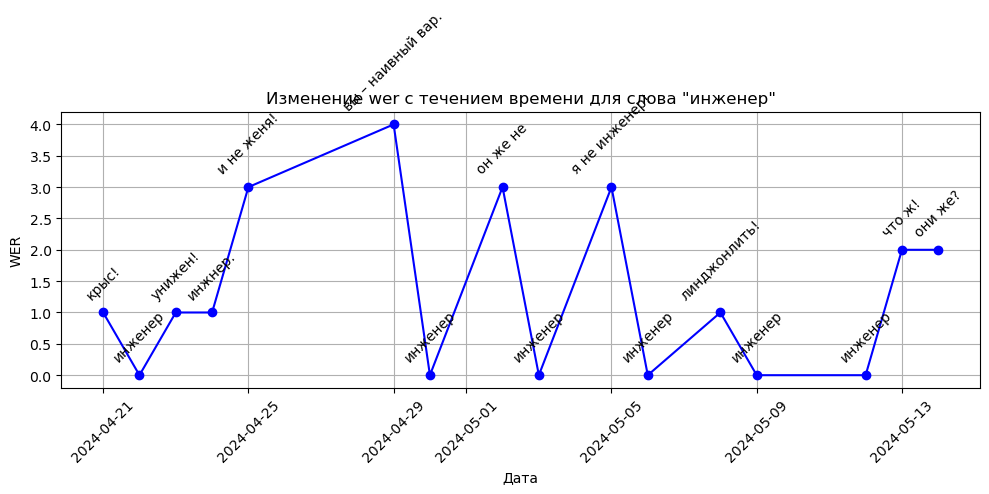

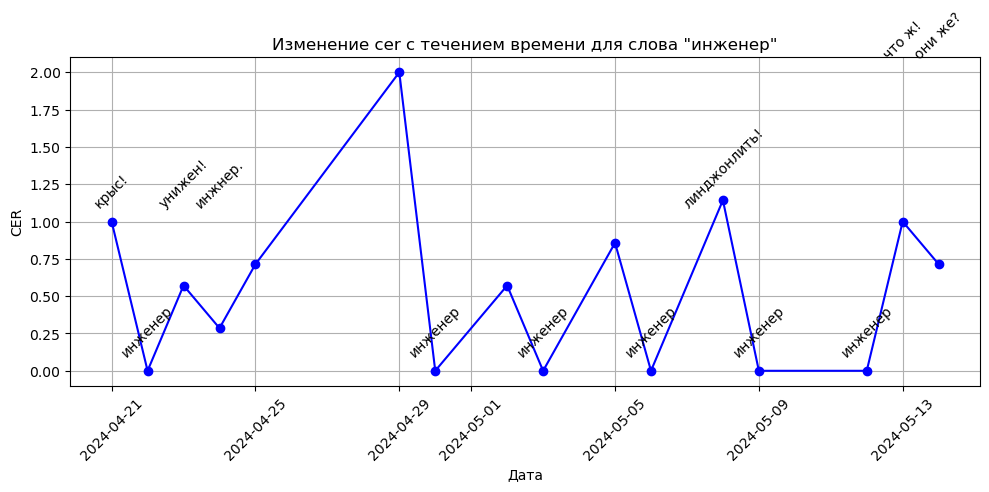

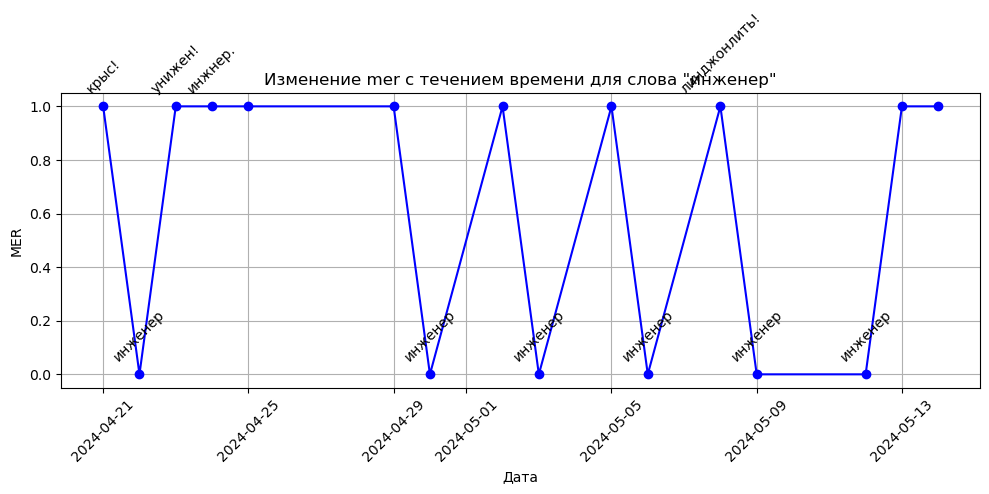

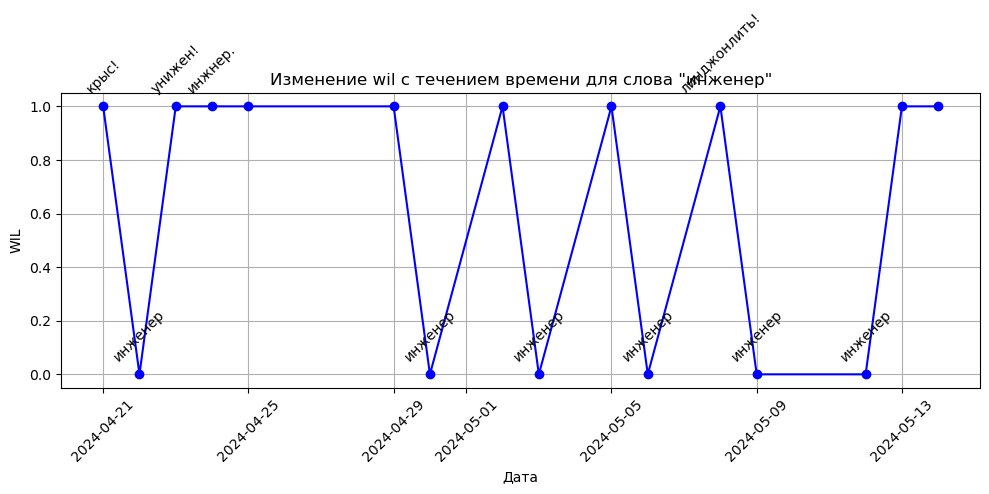

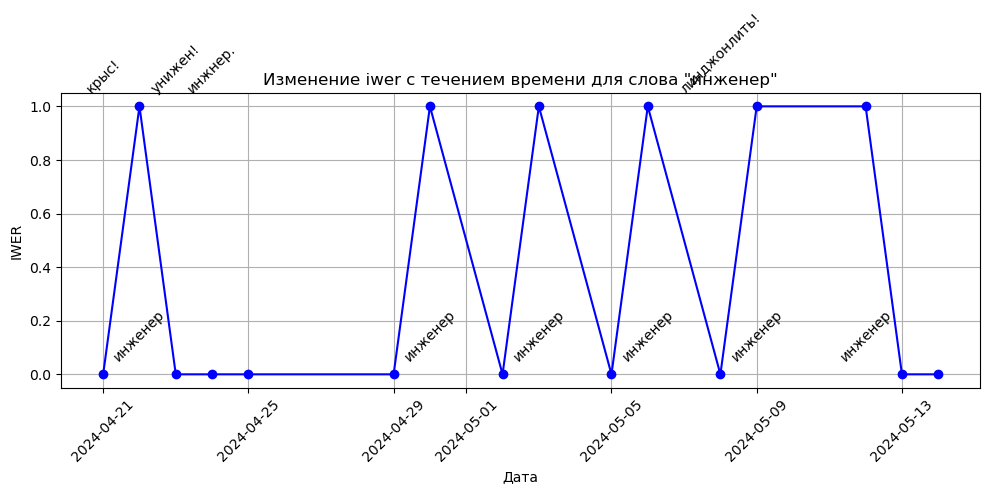

In [28]:
for metric in metrics:
    # Построение графика
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df.index, filtered_df[metric], marker='o', linestyle='-', color='b')
    plt.title(f'Изменение {metric} с течением времени для слова "инженер"')
    plt.xlabel('Дата')
    plt.ylabel(metric.upper())
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Добавление надписей
    for idx, row in filtered_df.iterrows():
        plt.annotate(row['transcription_word'], (idx, row['wer']), textcoords="offset points", xytext=(0,10), ha='center', rotation=45)
    
    plt.tight_layout()
    
    # Показ графика
    plt.show()